<a href="https://colab.research.google.com/github/maskot1977/PythonCourse2019/blob/master/RNN_g_middle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 関数の定義

In [0]:
import numpy as np

def f(t, freq=50):
    return np.sin(2. * np.pi * t / freq)

def g(t, freq=50, amp=10, threshold = 10):
    return 1/(1 + np.exp(10 * np.sin(2 * np.pi * t / freq) + 10))

def h(t, freqs=[7, 11, 23, 31]):
    value = np.zeros_like(t)
    for freq in freqs:
        value += f(t, freq)
    return value

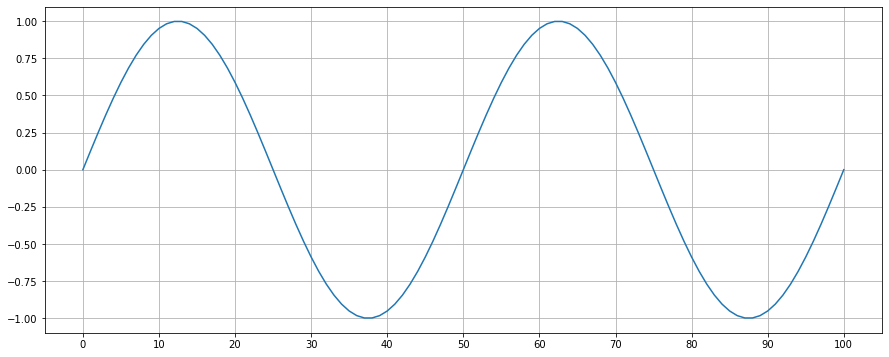

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

total_time_length = 100
times = np.linspace(0, total_time_length, total_time_length + 1)

plt.figure(figsize=(15, 6))
plt.plot(f(times))
plt.xticks(np.linspace(0, 100, 11))
plt.grid()

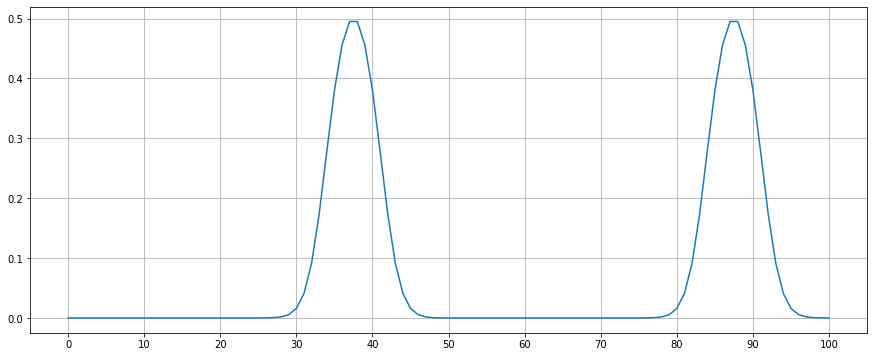

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

total_time_length = 100
times = np.linspace(0, total_time_length, total_time_length + 1)

plt.figure(figsize=(15, 6))
plt.plot(g(times))
plt.xticks(np.linspace(0, 100, 11))
plt.grid()

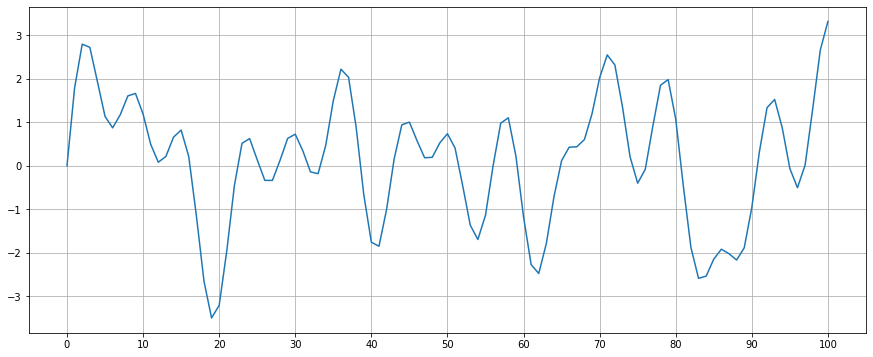

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

total_time_length = 100
times = np.linspace(0, total_time_length, total_time_length + 1)

plt.figure(figsize=(15, 6))
plt.plot(h(times))
plt.xticks(np.linspace(0, 100, 11))
plt.grid()

# 関数のフーリエ変換

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: RuntimeWarning: divide by zero e

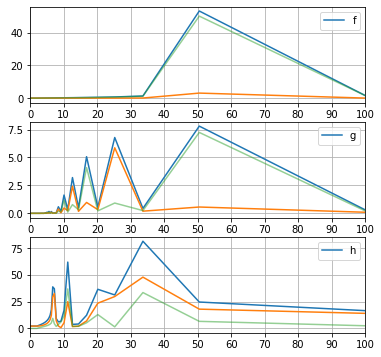

In [0]:
plt.figure(figsize=(6,6))

sp = np.fft.fft(f(times))
freq = np.fft.fftfreq(times.shape[-1])

plt.subplot(311)
plt.plot(1/freq, abs(sp.real) + abs(sp.imag), label="f")
plt.plot(1/freq, abs(sp.real))
plt.plot(1/freq, abs(sp.imag), alpha=0.5)
plt.legend()
plt.xlim([0, 100])
plt.xticks(np.linspace(0, 100, 11))
plt.grid()

sp = np.fft.fft(g(times))
freq = np.fft.fftfreq(times.shape[-1])

plt.subplot(312)
plt.plot(1/freq, abs(sp.real) + abs(sp.imag), label="g")
plt.plot(1/freq, abs(sp.real))
plt.plot(1/freq, abs(sp.imag), alpha=0.5)
plt.legend()
plt.xlim([0, 100])
plt.xticks(np.linspace(0, 100, 11))
plt.grid()

sp = np.fft.fft(h(times))
freq = np.fft.fftfreq(times.shape[-1])

plt.subplot(313)
plt.plot(1/freq, abs(sp.real) + abs(sp.imag), label="h")
plt.plot(1/freq, abs(sp.real))
plt.plot(1/freq, abs(sp.imag), alpha=0.5)
plt.legend()
plt.xlim([0, 100])
plt.xticks(np.linspace(0, 100, 11))
plt.grid()

# 時系列データセットの作成

In [0]:
import numpy as np
from sklearn.model_selection import train_test_split

func = g

total_time_length = 10000
pred_length = 1000
learning_time_length = 100
time_series_T = np.linspace(0, total_time_length, total_time_length + 1)
time_series_X = func(time_series_T)

X_learn = []
Y_learn = []
for i in range(total_time_length - learning_time_length):
    X_learn.append(time_series_X[i:i+learning_time_length].reshape(1, learning_time_length).T)
    Y_learn.append([time_series_X[i+learning_time_length]])

X_train, X_val, Y_train, Y_val = \
train_test_split(X_learn, Y_learn, test_size=0.2, shuffle=False)

X_train2sklearn = [list(x.reshape(1, len(x))[0]) for x in X_train]
Y_train2sklearn = [y[0] for y in Y_train]

# 多層パーセプトロン(scikit-learn)

In [0]:
%%time
from sklearn.neural_network import MLPRegressor
regressor = MLPRegressor(hidden_layer_sizes=(100, 100, 100), 
                         early_stopping=True, max_iter=10000) # 回帰器の生成
regressor.fit(X_train2sklearn, Y_train2sklearn) # 学習

CPU times: user 2.93 s, sys: 1.44 s, total: 4.37 s
Wall time: 2.26 s


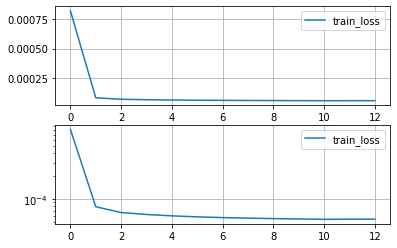

In [0]:
plt.plot(regressor.loss_curve_)
%matplotlib inline
import matplotlib.pyplot as plt
plt.subplot(211)
plt.plot(regressor.loss_curve_, label='train_loss')
plt.legend()
plt.grid()
plt.subplot(212)
plt.plot(regressor.loss_curve_, label='train_loss')
plt.yscale('log')
plt.legend()
plt.grid()

In [0]:
%%time
pred_length = 1000
X_pred_length = np.linspace(0, pred_length , pred_length + 1)
Y_observed = func(X_pred_length)
Y_pred = Y_observed[:learning_time_length+1]

for i in range(pred_length):
    X_ = [Y_pred[i:i+learning_time_length]]
    Y_ = regressor.predict(X_)
    Y_pred = np.append(Y_pred, Y_)

CPU times: user 415 ms, sys: 356 ms, total: 771 ms
Wall time: 409 ms


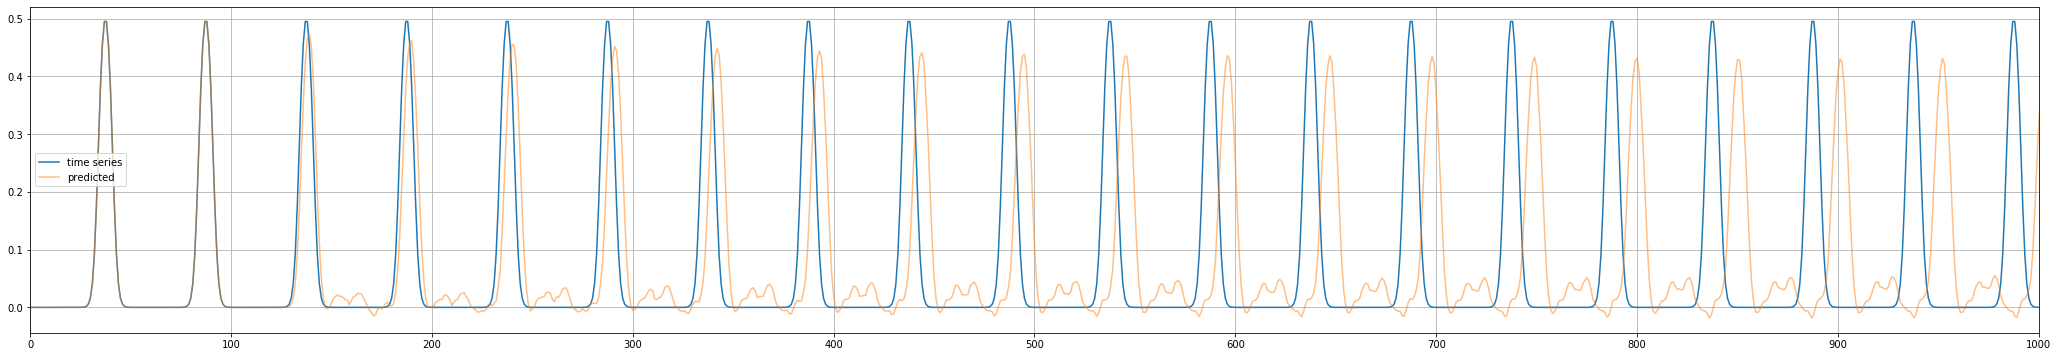

In [0]:
plt.figure(figsize=(36, 6))
times = np.linspace(0, Y_pred.shape[0] - 1, Y_pred.shape[0])
plt.plot(func(times), label="time series")
plt.plot(Y_pred, alpha=0.5, label="predicted")
plt.xticks(np.linspace(0, 1000, 11))
plt.xlim([0, 1000])
plt.grid()
plt.legend()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in true_divide


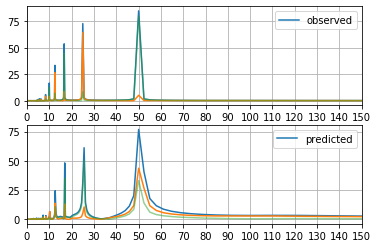

In [0]:
plt.figure(figsize=(6,4))

sp = np.fft.fft(func(times))
freq = np.fft.fftfreq(times.shape[-1])

plt.subplot(211)
plt.plot(1/freq, abs(sp.real) + abs(sp.imag), label="observed")
plt.plot(1/freq, abs(sp.real))
plt.plot(1/freq, abs(sp.imag), alpha=0.5)
plt.legend()
plt.xlim([0, 150])
plt.xticks(np.linspace(0, 150, 16))
plt.grid()

sp = np.fft.fft(Y_pred)
freq = np.fft.fftfreq(times.shape[-1])

plt.subplot(212)
plt.plot(1/freq, abs(sp.real) + abs(sp.imag), label="predicted")
plt.plot(1/freq, abs(sp.real))
plt.plot(1/freq, abs(sp.imag), alpha=0.5)
plt.legend()
plt.xlim([0, 150])
plt.xticks(np.linspace(0, 150, 16))
plt.grid()

# PyTorch で再帰的ニューラルネットワーク

In [0]:
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

## RNN

In [0]:
import torch
class RNN(torch.nn.Module):
    def __init__(self, hidden_dim):
        super().__init__()
        self.l1 = torch.nn.RNN(1, hidden_dim,
                         nonlinearity='tanh',
                         batch_first=True)
        self.l2 = torch.nn.Linear(hidden_dim, 1)
        torch.nn.init.xavier_normal_(self.l1.weight_ih_l0)
        torch.nn.init.orthogonal_(self.l1.weight_hh_l0)

    def forward(self, x):
        h, _ = self.l1(x)
        y = self.l2(h[:, -1])
        return y

## LSTM

In [0]:
import torch
class LSTM(torch.nn.Module):
    def __init__(self, hidden_dim):
        super().__init__()
        self.l1 = torch.nn.LSTM(1, hidden_dim, batch_first=True)
        self.l2 = torch.nn.Linear(hidden_dim, 1)
        torch.nn.init.xavier_normal_(self.l1.weight_ih_l0)
        torch.nn.init.orthogonal_(self.l1.weight_hh_l0)

    def forward(self, x):
        h, _ = self.l1(x)
        y = self.l2(h[:, -1])
        return y

## GRU

In [0]:
import torch
class GRU(torch.nn.Module):
    def __init__(self, hidden_dim):
        super().__init__()
        self.l1 = torch.nn.GRU(1, hidden_dim, batch_first=True)
        self.l2 = torch.nn.Linear(hidden_dim, 1)
        torch.nn.init.xavier_normal_(self.l1.weight_ih_l0)
        torch.nn.init.orthogonal_(self.l1.weight_hh_l0)

    def forward(self, x):
        h, _ = self.l1(x)
        y = self.l2(h[:, -1])
        return y

## EarlyStopping

In [0]:
def EarlyStopping(log, patience=20):
    if len(log) <= patience:
        return False
    min1 = log[:len(log)-patience].min()
    min2 = log[len(log)-patience:].min()
    if min1 <= min2:
        return True
    else:
        return False

## RNN の実行

In [0]:
%%time
from sklearn.utils import shuffle
model = RNN(50).to(device)
criterion = torch.nn.MSELoss(reduction='mean')
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, 
                            betas=(0.9, 0.999), amsgrad=True)

epochs = 1000
batch_size = 100
n_batches_train = len(X_train) // batch_size - 1
n_batches_test = len(X_val) // batch_size - 1
hist = {'train_loss':[], 'val_loss':[]}

for epoch in range(epochs):
    train_loss = 0.
    val_loss = 0.
    X_, Y_ = shuffle(X_train, Y_train)

    for batch in range(n_batches_train):
        start = batch * batch_size
        end = start + batch_size
        X = torch.Tensor(X_[start:end])
        Y = torch.Tensor(Y_[start:end])
        model.train()
        Y_pred = model(X)
        loss = criterion(Y, Y_pred)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    for batch in range(n_batches_test):
        start = batch * batch_size
        end = start + batch_size
        X = torch.Tensor(X_val[start:end])
        Y = torch.Tensor(Y_val[start:end])
        model.eval()
        Y_pred = model(X)
        loss = criterion(Y, Y_pred)
        val_loss += loss.item()
    
    train_loss /= n_batches_train
    val_loss /= n_batches_test
    hist['train_loss'].append(train_loss)
    hist['val_loss'].append(val_loss)
    print("Epoch:", epoch + 1, "Train loss:", train_loss, "Val loss:", val_loss)

    if EarlyStopping(np.array(hist['val_loss'])):
        print("Early stopping at epoch", epoch + 1)
        break

Epoch: 1 Train loss: 0.003970355476970629 Val loss: 0.0001842707715695724
Epoch: 2 Train loss: 5.6282152609828e-05 Val loss: 3.1537307222606614e-05
Epoch: 3 Train loss: 3.229902862445809e-05 Val loss: 1.8951352103613317e-05
Epoch: 4 Train loss: 1.398952427058621e-05 Val loss: 7.5051193562103435e-06
Epoch: 5 Train loss: 1.187679728713985e-05 Val loss: 4.842094313062262e-06
Epoch: 6 Train loss: 4.9420718503311855e-06 Val loss: 4.932756837661145e-06
Epoch: 7 Train loss: 3.391192927747164e-06 Val loss: 5.837451681145467e-06
Epoch: 8 Train loss: 2.175537075252065e-06 Val loss: 1.354976461698243e-06
Epoch: 9 Train loss: 3.082434779035117e-06 Val loss: 6.867025604151422e-06
Epoch: 10 Train loss: 1.7562862203645543e-06 Val loss: 4.061808340338757e-06
Epoch: 11 Train loss: 3.104347331081487e-06 Val loss: 1.6652693375363015e-06
Epoch: 12 Train loss: 3.1934524757231816e-06 Val loss: 1.647214617150894e-06
Epoch: 13 Train loss: 1.1880490543256737e-06 Val loss: 9.293838161283929e-07
Epoch: 14 Train 

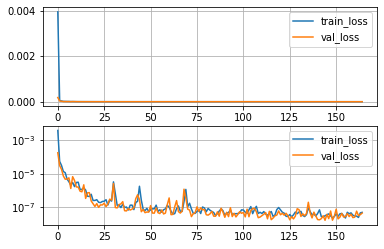

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.subplot(211)
plt.plot(hist['train_loss'], label='train_loss')
plt.plot(hist['val_loss'], label='val_loss')
plt.legend()
plt.grid()
plt.subplot(212)
plt.plot(hist['train_loss'], label='train_loss')
plt.plot(hist['val_loss'], label='val_loss')
plt.yscale('log')
plt.legend()
plt.grid()

In [0]:
%%time
total_time_length = 10000
pred_length = 1000
learning_time_length = 100

X_pred_length = np.linspace(0, pred_length , pred_length + 1)
Y_observed = func(X_pred_length)
Y_pred = Y_observed[:learning_time_length+1]

for i in range(pred_length):
    X_ = Y_pred[i:i+learning_time_length+1].reshape(1, learning_time_length + 1, 1)
    Y_ = model(torch.Tensor(X_)).detach().numpy()
    Y_pred = np.append(Y_pred, Y_)

CPU times: user 2.71 s, sys: 5.98 ms, total: 2.71 s
Wall time: 2.72 s


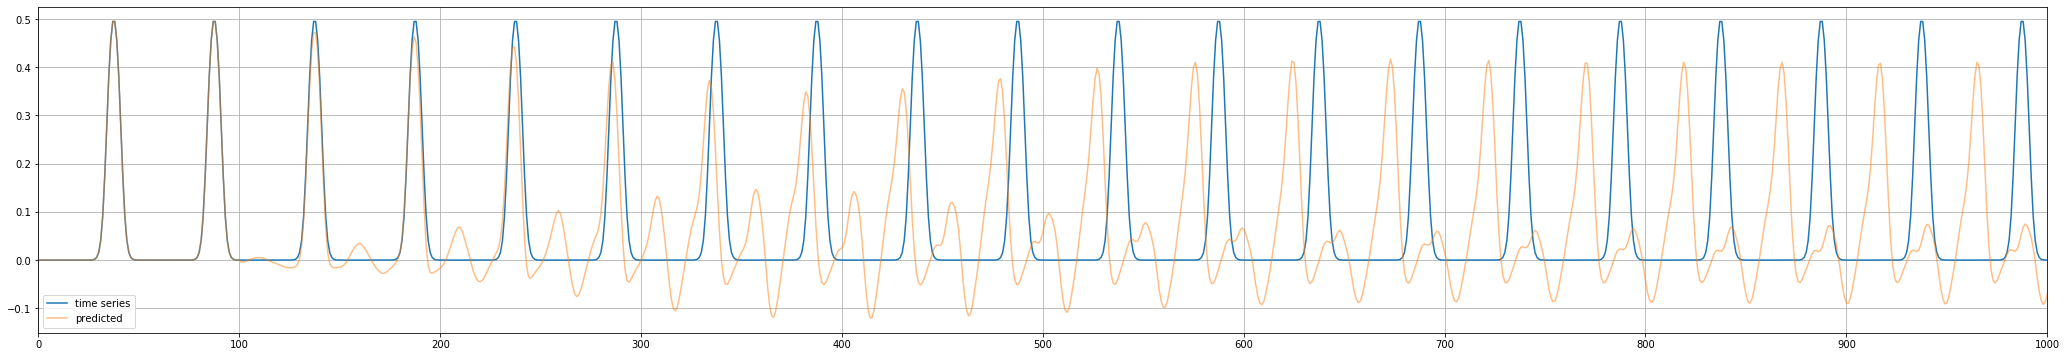

In [0]:
plt.figure(figsize=(36, 6))
times = np.linspace(0, Y_pred.shape[0] - 1, Y_pred.shape[0])
plt.plot(func(times), label="time series")
plt.plot(Y_pred, alpha=0.5, label="predicted")
plt.xticks(np.linspace(0, 1000, 11))
plt.xlim([0, 1000])
plt.grid()
plt.legend()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in true_divide


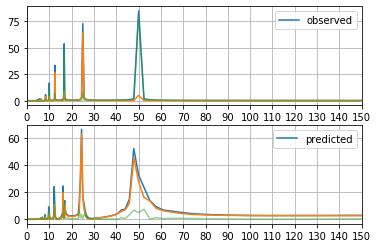

In [0]:
plt.figure(figsize=(6,4))

sp = np.fft.fft(func(times))
freq = np.fft.fftfreq(times.shape[-1])

plt.subplot(211)
plt.plot(1/freq, abs(sp.real) + abs(sp.imag), label="observed")
plt.plot(1/freq, abs(sp.real))
plt.plot(1/freq, abs(sp.imag), alpha=0.5)
plt.legend()
plt.xlim([0, 150])
plt.xticks(np.linspace(0, 150, 16))
plt.grid()

sp = np.fft.fft(Y_pred)
freq = np.fft.fftfreq(times.shape[-1])

plt.subplot(212)
plt.plot(1/freq, abs(sp.real) + abs(sp.imag), label="predicted")
plt.plot(1/freq, abs(sp.real))
plt.plot(1/freq, abs(sp.imag), alpha=0.5)
plt.legend()
plt.xlim([0, 150])
plt.xticks(np.linspace(0, 150, 16))
plt.grid()

## LSTM の実行

In [0]:
%%time
from sklearn.utils import shuffle
model = LSTM(50).to(device)
criterion = torch.nn.MSELoss(reduction='mean')
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, 
                            betas=(0.9, 0.999), amsgrad=True)

epochs = 1000
batch_size = 100
n_batches_train = len(X_train) // batch_size - 1
n_batches_test = len(X_val) // batch_size - 1
hist = {'train_loss':[], 'val_loss':[]}

for epoch in range(epochs):
    train_loss = 0.
    val_loss = 0.
    X_, Y_ = shuffle(X_train, Y_train)

    for batch in range(n_batches_train):
        start = batch * batch_size
        end = start + batch_size
        X = torch.Tensor(X_[start:end])
        Y = torch.Tensor(Y_[start:end])
        model.train()
        Y_pred = model(X)
        loss = criterion(Y, Y_pred)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    for batch in range(n_batches_test):
        start = batch * batch_size
        end = start + batch_size
        X = torch.Tensor(X_val[start:end])
        Y = torch.Tensor(Y_val[start:end])
        model.eval()
        Y_pred = model(X)
        loss = criterion(Y, Y_pred)
        val_loss += loss.item()
    
    train_loss /= n_batches_train
    val_loss /= n_batches_test
    hist['train_loss'].append(train_loss)
    hist['val_loss'].append(val_loss)
    print("Epoch:", epoch + 1, "Train loss:", train_loss, "Val loss:", val_loss)

    if EarlyStopping(np.array(hist['val_loss'])):
        print("Early stopping at epoch", epoch + 1)
        break

Epoch: 1 Train loss: 0.026055512233422354 Val loss: 0.01511214580386877
Epoch: 2 Train loss: 0.009493113740180165 Val loss: 0.004418188706040382
Epoch: 3 Train loss: 0.0021571876549830614 Val loss: 0.0008033063495531678
Epoch: 4 Train loss: 0.0007054880533803207 Val loss: 0.0005317835020832717
Epoch: 5 Train loss: 0.0004943592297749069 Val loss: 0.00037251217872835696
Epoch: 6 Train loss: 0.00023838911809621213 Val loss: 1.8698257918003947e-05
Epoch: 7 Train loss: 5.401490832996504e-05 Val loss: 1.528110988147091e-05
Epoch: 8 Train loss: 9.019583295902032e-06 Val loss: 3.2391595595981926e-05
Epoch: 9 Train loss: 1.0267796993409716e-05 Val loss: 5.334947672963608e-06
Epoch: 10 Train loss: 8.185399734336384e-06 Val loss: 1.1492700650705956e-05
Epoch: 11 Train loss: 1.8569421073175945e-05 Val loss: 2.9986214940436184e-05
Epoch: 12 Train loss: 8.915450044136938e-06 Val loss: 6.064901754143648e-06
Epoch: 13 Train loss: 7.0473877083434045e-06 Val loss: 6.6259240156796295e-06
Epoch: 14 Train 

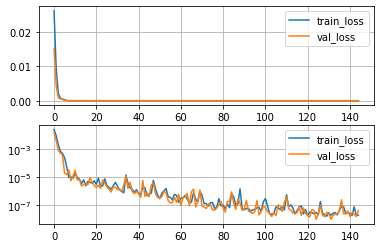

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.subplot(211)
plt.plot(hist['train_loss'], label='train_loss')
plt.plot(hist['val_loss'], label='val_loss')
plt.legend()
plt.grid()
plt.subplot(212)
plt.plot(hist['train_loss'], label='train_loss')
plt.plot(hist['val_loss'], label='val_loss')
plt.yscale('log')
plt.legend()
plt.grid()

In [0]:
%%time
total_time_length = 10000
pred_length = 1000
learning_time_length = 100

X_pred_length = np.linspace(0, pred_length , pred_length + 1)
Y_observed = func(X_pred_length)
Y_pred = Y_observed[:learning_time_length+1]

for i in range(pred_length):
    X_ = Y_pred[i:i+learning_time_length+1].reshape(1, learning_time_length + 1, 1)
    Y_ = model(torch.Tensor(X_)).detach().numpy()
    Y_pred = np.append(Y_pred, Y_)

CPU times: user 9.17 s, sys: 14.1 ms, total: 9.18 s
Wall time: 9.18 s


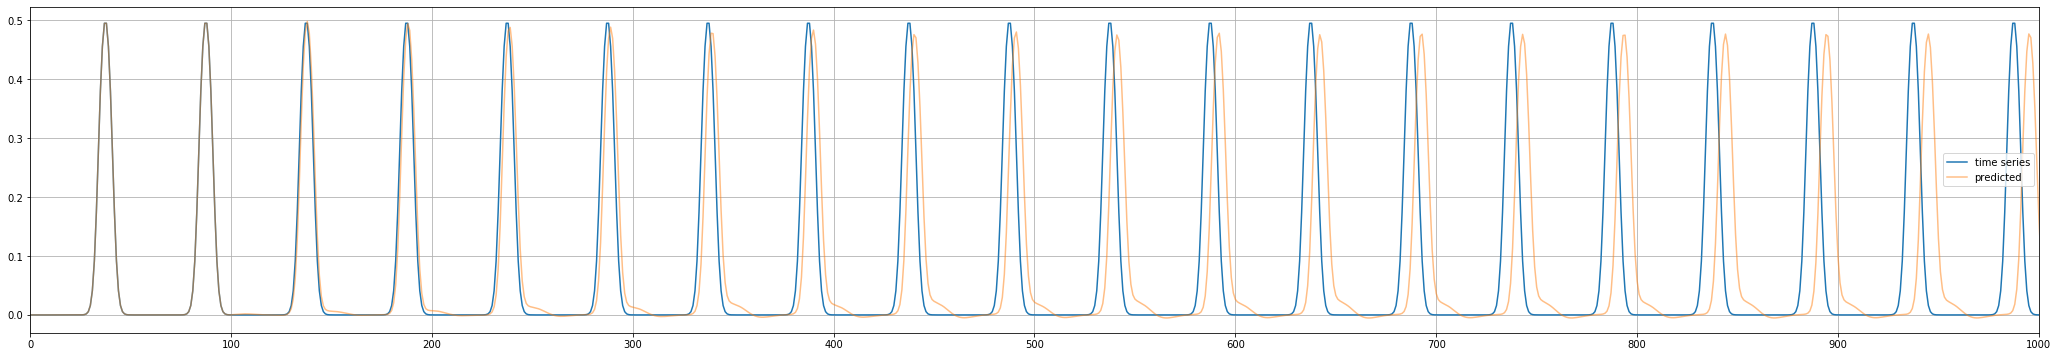

In [0]:
plt.figure(figsize=(36, 6))
times = np.linspace(0, Y_pred.shape[0] - 1, Y_pred.shape[0])
plt.plot(func(times), label="time series")
plt.plot(Y_pred, alpha=0.5, label="predicted")
plt.xticks(np.linspace(0, 1000, 11))
plt.xlim([0, 1000])
plt.grid()
plt.legend()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in true_divide


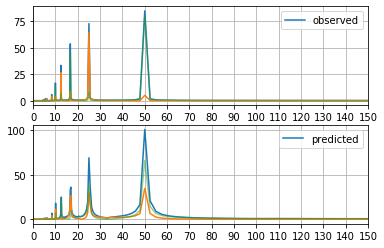

In [0]:
plt.figure(figsize=(6,4))

sp = np.fft.fft(func(times))
freq = np.fft.fftfreq(times.shape[-1])

plt.subplot(211)
plt.plot(1/freq, abs(sp.real) + abs(sp.imag), label="observed")
plt.plot(1/freq, abs(sp.real))
plt.plot(1/freq, abs(sp.imag), alpha=0.5)
plt.legend()
plt.xlim([0, 150])
plt.xticks(np.linspace(0, 150, 16))
plt.grid()

sp = np.fft.fft(Y_pred)
freq = np.fft.fftfreq(times.shape[-1])

plt.subplot(212)
plt.plot(1/freq, abs(sp.real) + abs(sp.imag), label="predicted")
plt.plot(1/freq, abs(sp.real))
plt.plot(1/freq, abs(sp.imag), alpha=0.5)
plt.legend()
plt.xlim([0, 150])
plt.xticks(np.linspace(0, 150, 16))
plt.grid()

## GRU の実行

In [0]:
%%time
from sklearn.utils import shuffle
model = GRU(50).to(device)
criterion = torch.nn.MSELoss(reduction='mean')
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, 
                            betas=(0.9, 0.999), amsgrad=True)

epochs = 1000
batch_size = 100
n_batches_train = len(X_train) // batch_size - 1
n_batches_test = len(X_val) // batch_size - 1
hist = {'train_loss':[], 'val_loss':[]}

for epoch in range(epochs):
    train_loss = 0.
    val_loss = 0.
    X_, Y_ = shuffle(X_train, Y_train)

    for batch in range(n_batches_train):
        start = batch * batch_size
        end = start + batch_size
        X = torch.Tensor(X_[start:end])
        Y = torch.Tensor(Y_[start:end])
        model.train()
        Y_pred = model(X)
        loss = criterion(Y, Y_pred)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    for batch in range(n_batches_test):
        start = batch * batch_size
        end = start + batch_size
        X = torch.Tensor(X_val[start:end])
        Y = torch.Tensor(Y_val[start:end])
        model.eval()
        Y_pred = model(X)
        loss = criterion(Y, Y_pred)
        val_loss += loss.item()
    
    train_loss /= n_batches_train
    val_loss /= n_batches_test
    hist['train_loss'].append(train_loss)
    hist['val_loss'].append(val_loss)
    print("Epoch:", epoch + 1, "Train loss:", train_loss, "Val loss:", val_loss)

    if EarlyStopping(np.array(hist['val_loss'])):
        print("Early stopping at epoch", epoch + 1)
        break

Epoch: 1 Train loss: 0.010230343308275899 Val loss: 0.0040601096116006374
Epoch: 2 Train loss: 0.0018047990526657742 Val loss: 0.0007560069789178669
Epoch: 3 Train loss: 0.0005890635548917672 Val loss: 0.00047926849219948053
Epoch: 4 Train loss: 0.00044393823955966253 Val loss: 0.0003867960476782173
Epoch: 5 Train loss: 0.00035006554706995253 Val loss: 0.0003001910517923534
Epoch: 6 Train loss: 0.0002964940470589611 Val loss: 0.0003195423341821879
Epoch: 7 Train loss: 0.00024186754522722764 Val loss: 0.0002195840934291482
Epoch: 8 Train loss: 0.00020964130780134254 Val loss: 0.00017662862956058234
Epoch: 9 Train loss: 0.00020098510960964725 Val loss: 0.00015180063201114535
Epoch: 10 Train loss: 0.00014900044838074021 Val loss: 0.00012905329640489072
Epoch: 11 Train loss: 0.00013437499430251474 Val loss: 0.00011797479965025559
Epoch: 12 Train loss: 0.00011293518615182106 Val loss: 0.0001068668716470711
Epoch: 13 Train loss: 0.00010233124680197738 Val loss: 0.00012938868894707412
Epoch: 

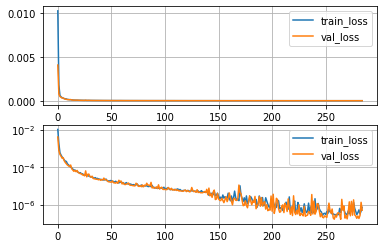

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.subplot(211)
plt.plot(hist['train_loss'], label='train_loss')
plt.plot(hist['val_loss'], label='val_loss')
plt.legend()
plt.grid()
plt.subplot(212)
plt.plot(hist['train_loss'], label='train_loss')
plt.plot(hist['val_loss'], label='val_loss')
plt.yscale('log')
plt.legend()
plt.grid()

In [0]:
%%time
total_time_length = 10000
pred_length = 1000
learning_time_length = 100

X_pred_length = np.linspace(0, pred_length , pred_length + 1)
Y_observed = func(X_pred_length)
Y_pred = Y_observed[:learning_time_length+1]

for i in range(pred_length):
    X_ = Y_pred[i:i+learning_time_length+1].reshape(1, learning_time_length + 1, 1)
    Y_ = model(torch.Tensor(X_)).detach().numpy()
    Y_pred = np.append(Y_pred, Y_)

CPU times: user 9.57 s, sys: 14 ms, total: 9.58 s
Wall time: 9.59 s


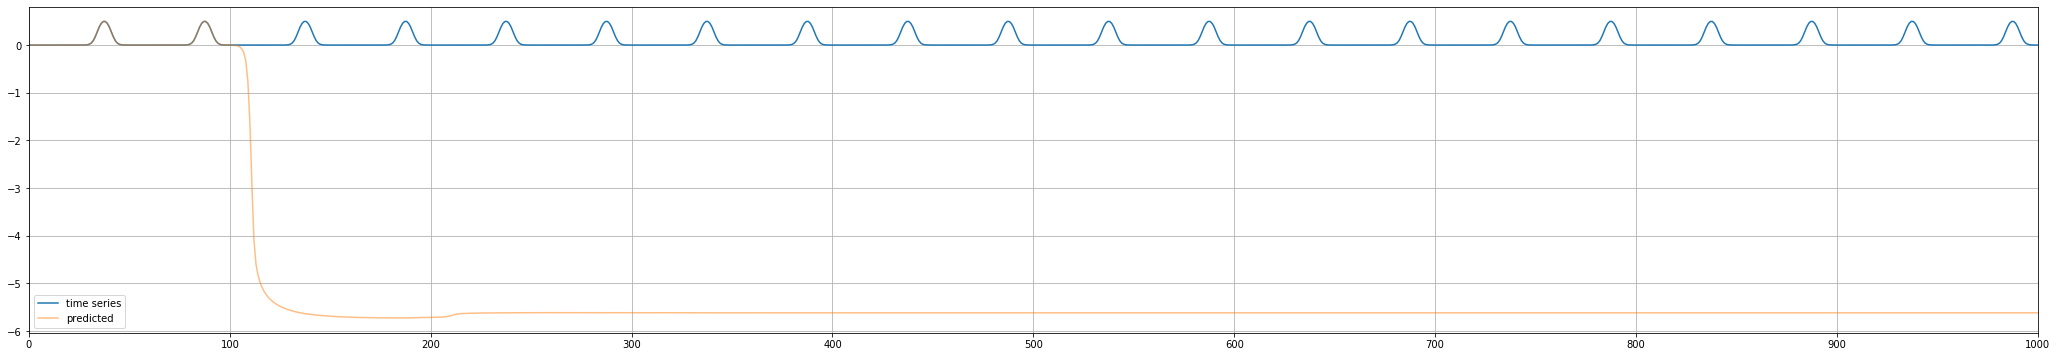

In [0]:
plt.figure(figsize=(36, 6))
times = np.linspace(0, Y_pred.shape[0] - 1, Y_pred.shape[0])
plt.plot(func(times), label="time series")
plt.plot(Y_pred, alpha=0.5, label="predicted")
plt.xticks(np.linspace(0, 1000, 11))
plt.xlim([0, 1000])
plt.grid()
plt.legend()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in true_divide


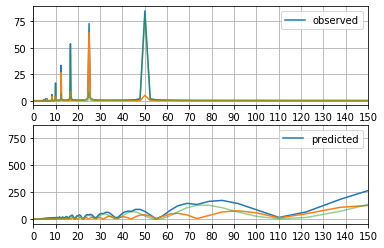

In [0]:
plt.figure(figsize=(6,4))

sp = np.fft.fft(func(times))
freq = np.fft.fftfreq(times.shape[-1])

plt.subplot(211)
plt.plot(1/freq, abs(sp.real) + abs(sp.imag), label="observed")
plt.plot(1/freq, abs(sp.real))
plt.plot(1/freq, abs(sp.imag), alpha=0.5)
plt.legend()
plt.xlim([0, 150])
plt.xticks(np.linspace(0, 150, 16))
plt.grid()

sp = np.fft.fft(Y_pred)
freq = np.fft.fftfreq(times.shape[-1])

plt.subplot(212)
plt.plot(1/freq, abs(sp.real) + abs(sp.imag), label="predicted")
plt.plot(1/freq, abs(sp.real))
plt.plot(1/freq, abs(sp.imag), alpha=0.5)
plt.legend()
plt.xlim([0, 150])
plt.xticks(np.linspace(0, 150, 16))
plt.grid()